In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy import linalg
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from os import sys
import ss_utils as ut

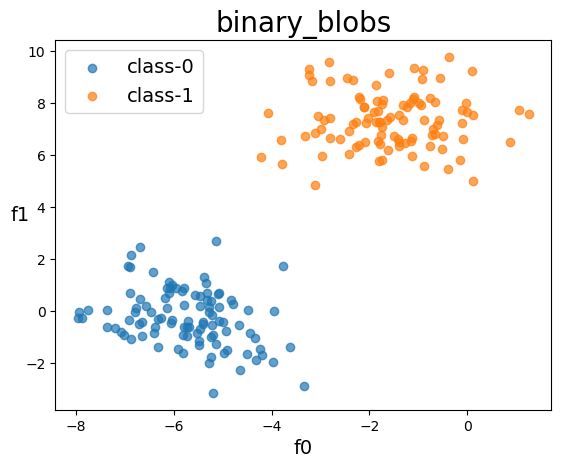

In [2]:
# Load dataset
title =  "binary_blobs"
path = "../datasets/toy/{}.csv".format(title)

# Get the data and its labels
X, y = ut.read_dataset(path, "label")

# Plot dataset
ut.plot_dataset(X, "f0", "f1", y, title) 

In [3]:
# Get unique labels
unique_labels = y.unique()
print("Unique Labels:", unique_labels)

Unique Labels: [1 0]


In [4]:
# Classification model
clf = GaussianNB()

# Train the model with the data
clf.fit(X, y)

/home/sinem/.conda/envs/437e/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/sinem/.conda/envs/437e/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/sinem/.conda/envs/437e/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/sinem/.conda/envs/437e/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

GaussianNB()

In [5]:
# Parameters that are learned from the data

# class_count_ attribute: Number of training samples observed in each class.
for label, count, in zip(unique_labels, clf.class_count_):
    print("{} training samples observed in class {}".format(count, label))
    
# class_prior_ attribute: Probability of each class
for label, prior_prob, in zip(unique_labels, clf.class_prior_):
    print("Probability of class {} is {}".format(label, prior_prob))

# theta_ attribute: Mean of each feature per class.
for label, mean, in zip(unique_labels, clf.theta_):
    print("Class {} means for each feature are {}".format(label, mean))

# var_ attribute: Variance of each feature per class.    
for label, variance, in zip(unique_labels, clf.var_):
    print("Class {} variances for each feature are {}".format(label, variance))  

# Names of features seen during fit. 
# Defined only when X has feature names that are all strings.    
for label, feature_names, in zip(unique_labels, clf.feature_names_in_):
    print("Class {} feature name is {}".format(label, feature_names))        
    

100.0 training samples observed in class 1
100.0 training samples observed in class 0
Probability of class 1 is 0.5
Probability of class 0 is 0.5
Class 1 means for each feature are [-5.73090492 -0.24513015]
Class 0 means for each feature are [-1.58304073  7.32671996]
Class 1 variances for each feature are [0.95448443 1.1518718 ]
Class 0 variances for each feature are [1.21619511 1.11126627]
Class 1 feature name is f0
Class 0 feature name is f1


/home/sinem/Desktop/437E/naive_bayes/ss_utils.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xmin, xmax = mins[0], maxs[0]
/home/sinem/Desktop/437E/naive_bayes/ss_utils.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ymin, ymax = mins[1], maxs[1]
/home/sinem/.conda/envs/437e/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/tmp/ipykernel_158534/3822989967.py:28: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter 

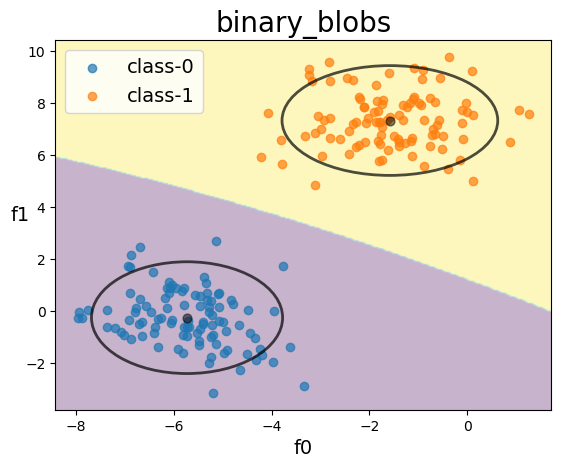

In [6]:
# Plot dataset
ut.plot_dataset(X, "f0", "f1", y, title) 

# Plot decision boundary
ut.plot_boundary(clf, X, "f0", "f1")

# Display means
ut.disp_point(clf.theta_)

means = clf.theta_
sigmas = clf.var_

conf_level = 2 # But remember our discussions about chi square distribution

# Plot ellipses for each class with "conf_level" confidence level
for mean, sigma in zip(means, sigmas):
    covar = [[sigma[0], 0.0],
             [0.0, sigma[1]]]
    eig_val, eig_vec = np.linalg.eigh(covar)    
    major_length = 2*conf_level*(np.sqrt(eig_val[0]))
    minor_length = 2*conf_level*(np.sqrt(eig_val[1]))

    
    u = eig_vec[0] / linalg.norm(eig_vec[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180.0*angle/np.pi
    
    ellipse = mpl.patches.Ellipse(mean, major_length, minor_length, angle, 
                              linestyle="-", linewidth=2, 
                              edgecolor="black", facecolor='none', 
                              alpha=0.7, zorder=30)
    ax = plt.gca()
    ellipse.set_clip_box(ax.bbox)
    ax.add_artist(ellipse)

In [ ]:
# END